In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_info_columns', 10_000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200_000)     # zeigt Zeileninfo, wenn nötig


# Pfad zur Datei (liegt im gleichen Ordner wie das Notebook)
path = Path("dataset/311_Service_Requests_2024.csv.")

# Einfacher Import
df = pd.read_csv(path)

In [8]:
print(list(df.columns))

['SR_NUMBER', 'SR_TYPE', 'SR_SHORT_CODE', 'CREATED_DEPARTMENT', 'OWNER_DEPARTMENT', 'STATUS', 'ORIGIN', 'CREATED_DATE', 'LAST_MODIFIED_DATE', 'CLOSED_DATE', 'STREET_ADDRESS', 'CITY', 'STATE', 'ZIP_CODE', 'STREET_NUMBER', 'STREET_DIRECTION', 'STREET_NAME', 'STREET_TYPE', 'DUPLICATE', 'LEGACY_RECORD', 'LEGACY_SR_NUMBER', 'PARENT_SR_NUMBER', 'COMMUNITY_AREA', 'WARD', 'ELECTRICAL_DISTRICT', 'ELECTRICITY_GRID', 'POLICE_SECTOR', 'POLICE_DISTRICT', 'POLICE_BEAT', 'PRECINCT', 'SANITATION_DIVISION_DAYS', 'CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH', 'X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION']


# Spalten: 

* __SR_NUMBER__ : Service Request Number, starts with SR24 (for year 2024) then 8 digits, Example SR25-01854880
* __SR_TYPE__ : states the type of the Service Request, Example 311 INFORMATION ONLY CALL
* __SR_SHORT_CODE__ : every type has a short code for example 311IOC 
* __CREATED_DEPARTMENT__ : The department, if any, that created the service request. Example CDOT - Department of Transportation
* __OWNER_DEPARTMENT__ : The department with initial responsibility for the service request. Example 311 City Services
* __STATUS__ : states if it is open or completed, Example Open
* __ORIGIN__ : where the request was created, Example Phone Call
* __CREATED_DATE__
* __LAST_MODIFIED_DATE__
* __CLOSED_DATE__
* __STREET_ADDRESS__
* __CITY__
* __STATE__
* __ZIP_CODE__
* __STREET_NUMBER__
* __STREET_DIRECTION__ : the direction of the street in N, W, E, S Example N
* __STREET_NAME__
* __STREET_TYPE__
* __DUPLICATE__
* __LEGACY_RECORD__ : Did this request originate in the previous 311 system?
* __LEGACY_SR_NUMBER__ : is NaN
* __PARENT_SR_NUMBER__ : is NaN
* __COMMUNITY_AREA__
* __WARD__
* __ELECTRICAL_DISTRICT__
* __ELECTRICITY_GRID__
* __POLICE_SECTOR__
* __POLICE_DISTRICT__
* __POLICE_BEAT__
* __PRECINCT__
* __SANITATION_DIVISION_DAYS__ : has only Missing Values
* __CREATED_HOUR__ : 
* __CREATED_DAY_OF_WEEK__ : The day of the week component of CREATED_DATE. Sunday=1
* __CREATED_MONTH__
* __X_COORDINATE__ : The x coordinate of the location in State Plane Illinois East NAD 1983 projection.
* __Y_COORDINATE__ : The y coordinate of the location in State Plane Illinois East NAD 1983 projection.
* __LATITUDE__
* __LONGITUDE__
* __LOCATION__ : The location in a format that allows for creation of maps and other geographic operations on this data portal.


In [9]:

# schneller Blick
df.head()

,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,STATE,ZIP_CODE,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,DUPLICATE,LEGACY_RECORD,LEGACY_SR_NUMBER,PARENT_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,ELECTRICITY_GRID,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR24-02338876,Stray Animal Complaint,EAE,311 City Services,Animal Care and Control,Canceled,Phone Call,2024-12-31 23:59:43,01/06/2025 11:41:31 AM,01/06/2025 11:41:31 AM,2138 W CERMAK RD,Chicago,Illinois,60608.0,2138,W,CERMAK,RD,False,False,NaN,NaN,31.0,25.0,NaN,K026,3.0,12.0,1234.0,30.0,NaN,23,3,12,1.162279e+06,1.889470e+06,41.852376,-87.679881,"(41.852376000940346, -87.6798810000019)"
1,SR24-02338875,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:56:45,01/01/2025 12:31:44 AM,12/31/2024 11:56:45 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,NaN,K024,2.0,12.0,1225.0,46.0,NaN,23,3,12,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094043, -87.6798450000019)"
2,SR24-02338874,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:55:30,01/01/2025 12:31:24 AM,12/31/2024 11:55:30 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,NaN,K024,2.0,12.0,1225.0,46.0,NaN,23,3,12,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094043, -87.6798450000019)"
3,SR24-02338873,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:53:21,01/01/2025 12:31:44 AM,12/31/2024 11:53:21 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,NaN,K024,2.0,12.0,1225.0,46.0,NaN,23,3,12,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094043, -87.6798450000019)"
4,SR24-02338872,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:51:22,01/01/2025 12:31:24 AM,12/31/2024 11:51:22 PM,2111 W Lexington ST,Chicago,Illinois,60612.0,2111,W,Lexington,ST,False,False,NaN,NaN,28.0,28.0,NaN,K024,2.0,12.0,1225.0,46.0,NaN,23,3,12,1.162234e+06,1.896561e+06,41.871834,-87.679845,"(41.87183400094043, -87.6798450000019)"


In [10]:
from IPython.display import display
display(df.nunique().to_frame('nunique')) #weil sonst die ausgabe gekürzt wird

,nunique
SR_NUMBER,1913929
SR_TYPE,107
SR_SHORT_CODE,107
CREATED_DEPARTMENT,14
OWNER_DEPARTMENT,14
STATUS,3
ORIGIN,32
CREATED_DATE,1772924
LAST_MODIFIED_DATE,747048
CLOSED_DATE,1657390


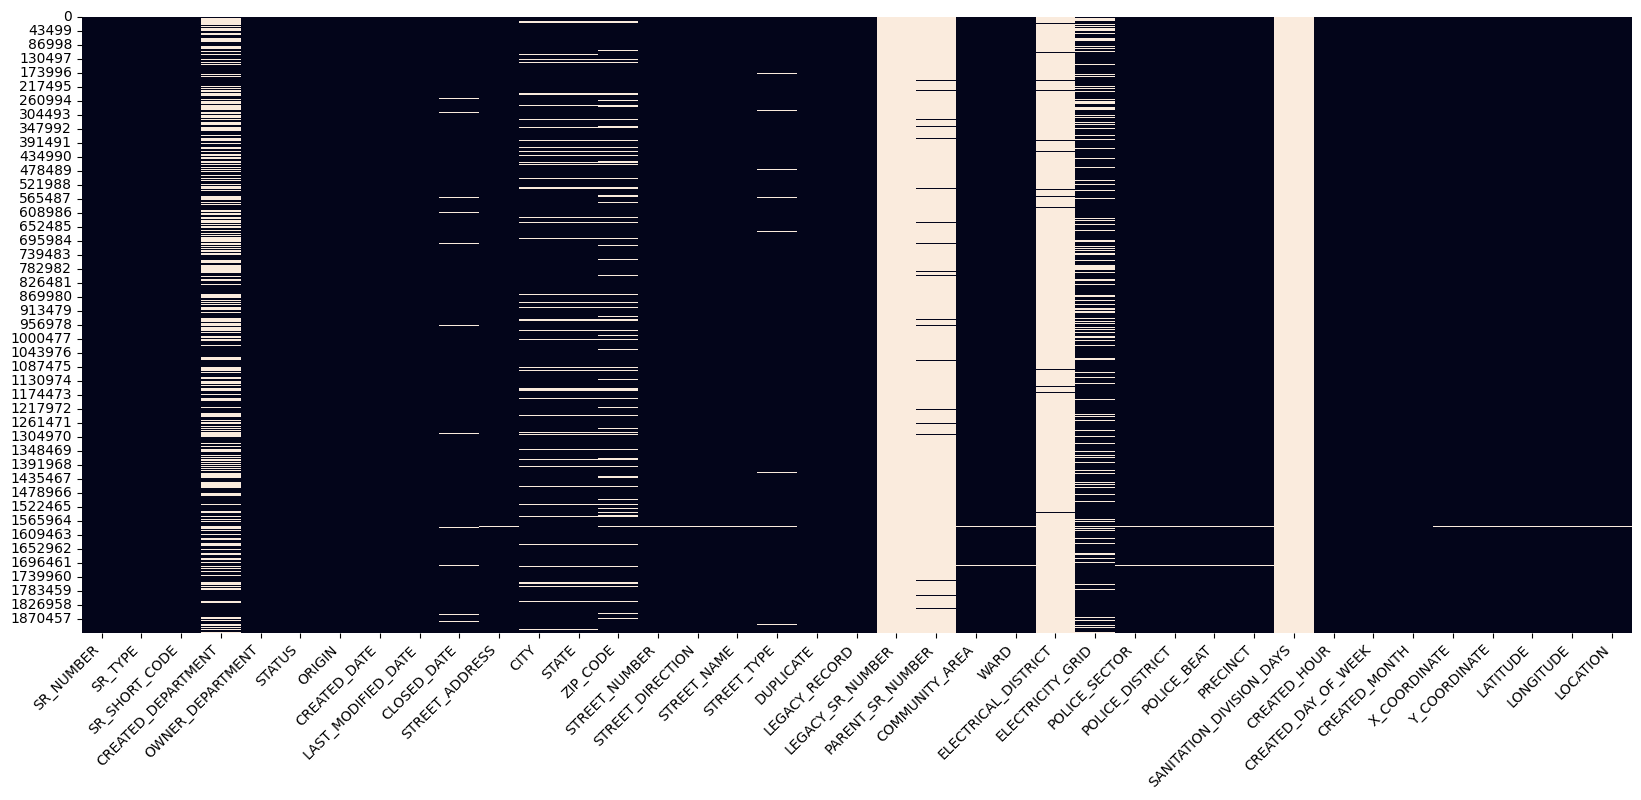

In [11]:
plt.figure(figsize=(20, 8))  # Breite und Höhe anpassen
sns.heatmap(df.isna(), cbar=False)
plt.xticks(rotation=45, ha='right')  # Achsenbeschriftung lesbar machen
plt.show()

In [12]:
df.shape

(1913929, 39)

In [15]:
df.describe()

,ZIP_CODE,LEGACY_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
count,1.702975e+06,0.0,1.912120e+06,1.912188e+06,41550.000000,1.912252e+06,1.912252e+06,1.912252e+06,1.911746e+06,0.0,1.913929e+06,1.913929e+06,1.913929e+06,1.912914e+06,1.912914e+06,1.912867e+06,1.912867e+06
mean,6.063042e+04,NaN,4.049084e+01,2.868989e+01,6.817978,2.517578e+00,1.305707e+01,1.334570e+03,3.074004e+01,NaN,1.296984e+01,3.928951e+00,6.280424e+00,1.151525e+06,1.901718e+06,4.188619e+01,-8.771910e+01
std,2.285236e+01,NaN,2.322360e+01,1.115448e+01,4.114783,1.294966e+00,4.887504e+00,4.919350e+02,1.432414e+01,NaN,4.958698e+00,1.854807e+00,3.311682e+00,2.453729e+04,3.008157e+04,8.227838e-02,8.922530e-02
min,6.001800e+04,NaN,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,1.110000e+02,1.000000e+00,NaN,0.000000e+00,1.000000e+00,1.000000e+00,-8.778141e+01,4.192789e+01,4.164465e+01,-8.791145e+01
25%,6.061200e+04,NaN,2.800000e+01,2.500000e+01,3.000000,2.000000e+00,1.200000e+01,1.225000e+03,2.100000e+01,NaN,9.000000e+00,2.000000e+00,4.000000e+00,1.142989e+06,1.896561e+06,4.187183e+01,-8.775014e+01
50%,6.061800e+04,NaN,2.800000e+01,2.800000e+01,6.000000,2.000000e+00,1.200000e+01,1.225000e+03,2.700000e+01,NaN,1.300000e+01,4.000000e+00,6.000000e+00,1.162234e+06,1.896561e+06,4.187183e+01,-8.767985e+01
75%,6.064900e+04,NaN,6.600000e+01,4.100000e+01,10.000000,3.000000e+00,1.600000e+01,1.654000e+03,4.600000e+01,NaN,1.700000e+01,5.000000e+00,9.000000e+00,1.162234e+06,1.928515e+06,4.195976e+01,-8.767985e+01
max,6.082700e+04,NaN,7.700000e+01,5.000000e+01,15.000000,5.000000e+00,3.100000e+01,3.100000e+03,5.700000e+01,NaN,2.300000e+01,7.000000e+00,1.200000e+01,1.205130e+06,1.951641e+06,4.202294e+01,-8.752453e+01
